Henry Pacheco Cachon

MA472

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from IPython.display import display, Math

# Introduction

The point of this notebook is to work through some of the R. Wu et al paper: "Bifurcation and Turing patterns of reaction-diffusion activator-inhibitor model"

First, the paper will uses this system known as a Gierer-Meinhardt system, which is one of the many prototypical pattern formation models made as a result of Turing's paper. The general Gierer-Meinhardt system is as follows:

\begin{cases}
\frac{\partial a}{\partial t} = \rho_0 \rho + c \rho \frac{a^r}{h^s} - \mu a + D_a \frac{\partial^2 a}{\partial x^2} \\
\frac{\partial h}{\partial t} = c' \rho' \frac{a^T}{h^u} - vh + D_h \frac{\partial^2 h}{\partial x^2}
\end{cases}

There are many different flavors of the Gierer-Meinhardt system, but they can be broken down into two main flavors: Ones in which $s \neq u$ (different sources for a and h) and ones in which $s = u$ (common sources for a and h).

This paper decided to use the cases in which the sources are different, and they opted to use the specific values, 

* $ u = 0 $
* $ s = 1 $
* $ r = 2 $
* $ T = 2 $

So now, the system used for in this paper is as follows

\begin{cases}
\frac{\partial a}{\partial t} = \rho_0 \rho + c \rho \frac{a^2}{h} - \mu a + D_a \frac{\partial^2 a}{\partial x^2} \\
\frac{\partial h}{\partial t} = c' \rho' a^2 - vh + D_h \frac{\partial^2 h}{\partial x^2}
\end{cases}

Like the Lotka-Volterra paper, Wu et al. decided to find a dimensionless version of this system. Using

* $ t = \frac{\tau}{v} $
* $ \bar{\mu} = \frac{\mu}{v} $
* $ D_H = \frac{D_h}{v} $
* $ D_A = \frac{D_a}{v} $

With these substitutions and the correct algebra/calculus, we get the following system of partial differential equations

\begin{cases}
\frac{\partial A}{\partial \tau} = c_0 + \frac{A^2}{H} - \bar{\mu} A + D_A \frac{\partial^2 A}{\partial x^2} \\
\frac{\partial H}{\partial \tau} = A^2 - H + D_H \frac{\partial^2 H}{\partial x^2}
\end{cases}

Wu et al. were nice enough to rewrite this equation in a less convoluted way, these are just variables but they look intimidating...

With $a$, $h$, $t$, $\mu$, $c$, $D_a$, $D_h$ being substituted for $A$, $H$, $\tau$, $\bar{\mu}$, $c_0$, $D_A$, $D_H$ respectively, we have the system of equations used for this paper

\begin{cases}
\frac{\partial a}{\partial t} = c + \frac{a^2}{h} - \mu a + D_a \frac{\partial^2 a}{\partial x^2} \\
\frac{\partial h}{\partial t} = a^2 - h + D_h \frac{\partial^2 h}{\partial x^2}
\end{cases} 

where $\mu$, $c$, $D_a$, $D_h$ > 0 and $a$, $h$ > 0. When the actual system is solved, Wu et al. use the Neumann boundary conditions defined as:

$$ \frac{\partial a}{\partial x}(0,t) = \frac{\partial a}{\partial x}(\pi, t) = 0 $$
$$ \frac{\partial h}{\partial x}(0,t) = \frac{\partial h}{\partial x}(\pi, t) = 0 $$

# Stable Conditions

Following the Lotka-Volterra model, there seems to be an algorithm for finding turing patterns. The first thing you must do is basically ignore the diffusion part of the model and only focus on the kinetics. Then you look for stable conditions in the kinetics, find the corresponding Jacobian of the model without the diffusion, and then find its characteristic equation. 

## Local system without diffusion terms

The system without diffusion terms is as follows:

\begin{cases} 
\frac{d a}{d t} = c + \frac{a^2}{h} - \mu a \\
\frac{d h}{d t} = a^2 - h 
\end{cases}

Wu et al. define this system in the following way,

$$ f(a,h) = c + \frac{a^2}{h} - \mu a $$
$$ g(a,h) = a^2 - h $$

The first step is to find the possible equilibrium points of this system. For this system, we are pretty lucky to get only one equilibrium point

$$ (a_0, h_0) = \left( \frac{c+1}{\mu} , \left( \frac{c+1}{\mu} \right)^2 \right) $$

**CHECK MA472 JOURNAL FOR DERIVATION AND VALIDATION**

Next we must characterize the equilibrium points. We can do this with the Jacobian and its eigenvalues when it is evaluated at the equilibrium point, $(a_0, h_0)$

The Jacobian for this system is as follows:

$$ J = \begin{bmatrix}
\frac{2a}{h} - \mu && -\frac{a^2}{h^2} \\
2a && -1
\end{bmatrix} $$

when we evaluate it at $(a_0,h_0)$, we get the following

$$ J(\mu) = 
\begin{bmatrix}
\left( \frac{1-c}{1+c} \right) \mu && - \left( \frac{\mu}{c+1} \right)^2 \\
2 \left( \frac{c+1}{\mu} \right) && -1
\end{bmatrix}
$$

$J(\mu)$ since $c$ is held between 0 and 1 in the paper, so the Jacobian in $(a_0,h_0)$ is really a function of $\mu > 0$.

Recall from linear algebra that for a matrix $A \in \mathbb{R}^{2 \times 2}$, its eigenvalues are given by the roots of its characteristic equation

$$ \lambda^2 - Tr(J(\mu)) \lambda + Det(J(\mu)) $$

That is, the eigenvalues $\lambda_1, \lambda_2$ are given by the following:

$$ \lambda_{1,2} = \frac{Tr(J(\mu))}{2} \pm \frac{\sqrt{(Tr(J(\mu)))^2 - 4 Det(J(\mu))}}{2} $$

Here, $Tr(J(\mu))$ is the trace of $J(\mu)$ and $Det(J(\mu))$ is the determinant of $J(\mu)$, for the case we have:

$$ Tr(J(\mu)) = \left( \frac{1-c}{1+c} \right) \mu - 1 $$
$$ Det(J(\mu)) = \mu $$

Stability analysis with the Jacobian is a pretty neat trick that I learned from the paper and looking around online. Anyways the rules are as follow:

**IF THE EIGENVALUES OF J ARE...**

1. Both negative or both have negative real parts, then the equilibrium point is asymptotically stable
2. Both positive or both have positive real parts, then the equilibrium point is unstable
3. Both zero or both have zero real parts, then more analysis needs to be done to see what kind of equilibrium point it is.

It turns out that for this model, $J(\mu)$ ends up having all three depending on the value of $\mu$.

* If $\mu = \frac{1+c}{1-c}$, we end up getting $\lambda_{1,2} = \pm i \sqrt{\frac{1+c}{1-c}}$
* If $\mu < \frac{1+c}{1-c}$, then we end up either having $\lambda_{1,2} \in \mathbb{R}$, but $\lambda_{1,2} < 0$ or having that $\lambda_{1,2} \in \mathbb{C}$, but $Re(\lambda_{1,2}) < 0$
* If $\mu > \frac{1+c}{1-c}$, then we have $\lambda_{1,2} \in \mathbb{R}$, but $\lambda_{1,2} > 0$ or having that $\lambda_{1,2} \in \mathbb{C}$, but $Re(\lambda_{1,2}) > 0$

So in summary we have 

* If $\mu = \frac{1+c}{1-c}$ then $(a_0,h_0)$ is a weird equilibrium point.
* If $\mu < \frac{1+c}{1-c}$ then $(a_0, h_0)$ is asymptotically stable
* If $\mu > \frac{1+c}{1-c}$ then $(a_0, h_0)$ is unstable

For the weird equilibrium points, the extra analysis we need is the Hopf bifurcation. Hopf bifurcations are basically points where the dynamics of the system goes from a stable point to a periodic system. The first condition is also known as a critical equilibrium point since this is where the system literally transitions into a different type of behavior.

## Phase diagrams

We can actually use phase diagrams to confirm our previous analysis of the $(a_0,h_0)$! And this is why I decided to do this in a jupyter notebook!

First, we will look at $(a_0,h_0)$ when it is a stable equilibrium point, that is when we have 

$$ \mu < \frac{1+c}{1-c} $$

In the paper, they have 

* $c = 0.5$
* $\mu = 1.5$

Since we need initial conditions for a numerical solver to solve this properly, they held

* $ a = h = 0.5$

as the initial condition!

In [3]:
c = 0.5
mu = 1.5

display(Math('\mu = 1.5'))
display(Math(r'\frac{{1+c}}{{1-c}} = {}'.format( (1+c)/(1-c) )) )
display(Math(r'\mu < \frac{{1 + c}}{{1 - c}}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
# Initializing the initial condition
v_in = [0.5,0.5]
# Initializing the points we want to be solved
t = np.linspace(0,30,1001)

In [5]:
# Defining our system of differential equations
def rhs(s,v):
    return [ c + (v[0]**2 / v[1]) - mu * v[0], 
             v[0]**2 - v[1] ]

# Solving the differential equations IVP
res = solve_ivp(rhs, (0, 100), v_in, t_eval=t)

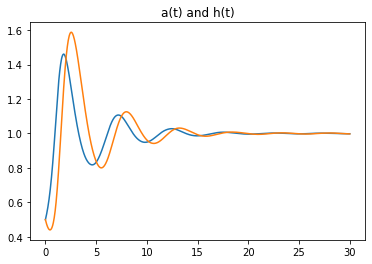

In [6]:
# Plotting solutions
plt.plot(res.t, res.y.T)
plt.title("a(t) and h(t)")
plt.show()

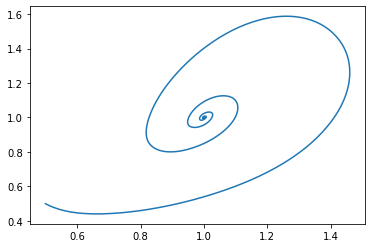

In [7]:
# Ploting our phase plots
plt.plot(res.y[0],res.y[1])
plt.show()

As you can see, with $c = 0.5$ and $\mu = 1.5$, we satisfy the conditions for a stable equilibrium point, and with the plots we confirm that the conditions predicted the correct equilibrium types (asymptotically stable results in inward spirals when looking at the phase space diagrams).

Now we will do the same but for $c = 0.5$ and $\mu = 3.0$

In [8]:
c = 0.5
mu = 3.0

display(Math('\mu = 1.5'))
display(Math(r'\frac{{1+c}}{{1-c}} = {}'.format( (1+c)/(1-c) )) )
display(Math(r'\mu = \frac{{1 + c}}{{1 - c}}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
# Solving the differential equations IVP
res = solve_ivp(rhs, (0, 100), v_in, t_eval=t)

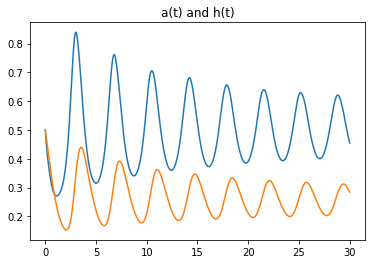

In [10]:
plt.plot(res.t, res.y.T)
plt.title("a(t) and h(t)")
plt.show()

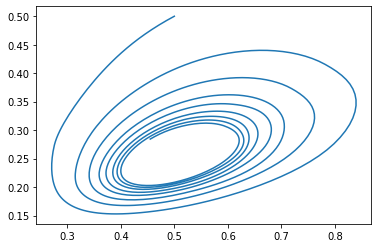

In [11]:
# Ploting our phase plots
plt.plot(res.y[0],res.y[1])
plt.show()